In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

# original = pd.read_csv('train.csv')
# import math
# original[original.Age.isnull()].count()
# original.count()

df = df.drop(['Ticket', 'Cabin'], axis=1)
df = df.dropna()

df

# pull out name into something more useful. 
import re
mrPattern = re.compile('.*Mr\..*')
missPattern = re.compile('.*Miss\..*')
masterPattern = re.compile('.*Master\..*')
mrsPattern = re.compile('.*Mrs\..*')
donPattern = re.compile('.*Don\..*')
revPattern = re.compile('.*Rev\..*')
drPattern = re.compile('.*Dr\..*')
mmePattern = re.compile('.*Mme\..*')
msPattern = re.compile('.*Ms\..*')
majorPattern = re.compile('.*Major\..*')
ladyPattern = re.compile('.*Lady\..*')
sirPattern = re.compile('.*Sir\..*')
mllePattern = re.compile('.*Mlle\..*')
colPattern = re.compile('.*Col\..*')
captPattern = re.compile('.*Capt\..*')
countessPattern = re.compile('.*Countess\..*')
jonkheerPattern = re.compile('.*Jonkheer\..*')

def nameToCategory(name):
    if (mrPattern.match(name)):
        return 'Mr'
    elif (jonkheerPattern.match(name)):
        return 'Other'
    elif (countessPattern.match(name)):
        return 'Other'
    elif (captPattern.match(name)):
        return 'Other'
    elif (missPattern.match(name)):
        return 'Miss'
    elif (masterPattern.match(name)):
        return 'Master'
    elif (mrsPattern.match(name)):
        return 'Mrs'
    elif (donPattern.match(name)):
        return 'Other'
    elif (revPattern.match(name)):
        return 'Other'
    elif (drPattern.match(name)):
        return 'Other'
    elif (mmePattern.match(name)):
        return 'Mrs'
    elif (msPattern.match(name)):
        return 'Miss'
    elif (majorPattern.match(name)):
        return 'Other'
    elif (ladyPattern.match(name)):
        return 'Other'
    elif (sirPattern.match(name)):
        return 'Other'
    elif (mllePattern.match(name)):
        return 'Miss'
    elif (colPattern.match(name)):
        return 'Other'
    return 'Other'
#    raise Exception(name)

df['Title'] = df.apply(lambda row: nameToCategory(row.Name), axis=1)
df.Title.value_counts()

Mr        398
Miss      148
Mrs       108
Master     36
Other      22
Name: Title, dtype: int64

In [2]:
import matplotlib.pyplot as plt


# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=100) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

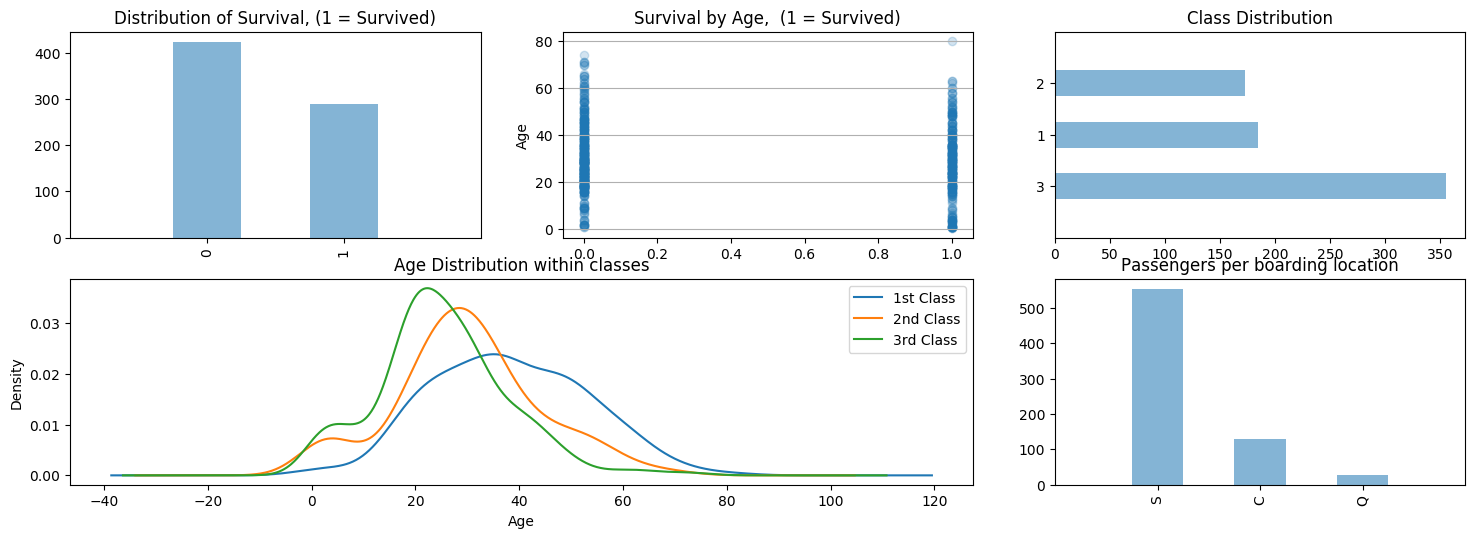

In [3]:
fig

In [4]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + C(Title)'
results = {}

In [5]:
from patsy import dmatrices
y,x = dmatrices(formula, data=df, return_type='dataframe')

import statsmodels.api as sm

model = sm.Logit(y, x)

res = model.fit()

results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.414228
         Iterations 32


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      700
Method:                           MLE   Df Model:                           11
Date:                Mon, 15 May 2017   Pseudo R-squ.:                  0.3861
Time:                        14:30:23   Log-Likelihood:                -294.93
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 8.485e-73
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            71.8341   7.78e+06   9.23e-06      1.000     -1.52e+07  1.52e+07
C(Pclass)[T.2]       -1.4097      0.325     -4.340      0.000        -2.046    -0.773
C(Pclass)[T.3]       -2.5139      0.316     -7.958      0.000        -3.133    -1.895
C(Sex)[T.male]      -67.1742   7.78e+06  -8.63e-06      1.000     -1.52e+07  1.52e+07
C(Embarked)[T.Q]     -0.9904      0.582     -1.701      0.089        -2.132     0.151
C(Embarked)[T.S]     -0.4946      0.282     -1.753      0.080        -1.048     0.058
C(Title)[T.Miss]    -67.6032   7.78e+06  -8.69e-06      1.000     -1.52e+07  1.52e+07
C(Title)[T.Mr]       -3.2096      0.589     -5.451      0.000        -4.364    -2.055
C(Title)[T.Mrs]     -66.9387   7.78e+06   -8.6e-06      1.000     -1.52e+07  1.52e+07
C(Title)[T.Other]    -3.1546      0.830     -3.798      0.000        -4.782    -1.527
Age                  -0.0317      0.010     -3.238      0.001        -0.051    -0.013
SibSp                -0.6300      0.134     -4.718      0.000        -0.892    -0.368
=====================================================================================
"""

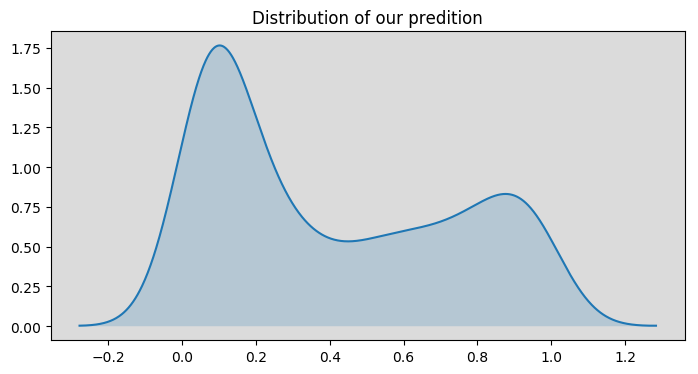

In [6]:
fig = plt.figure(figsize=(18, 9), dpi=100)
a = 0.2

fig.add_subplot(221, facecolor='#DBDBDB')

from statsmodels.nonparametric.kde import KDEUnivariate
kde_res = KDEUnivariate(res.predict())
kde_res.fit()

plt.plot(kde_res.support, kde_res.density)
plt.fill_between(kde_res.support, kde_res.density, alpha=a)
plt.title('Distribution of our predition')
fig

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm